In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Define grid world parameters
grid_size = 10
num_obstacles = 10
start_state = (0, 0)
goal_state = (9, 9)
max_steps = 100

# Define obstacle positions
obstacle_pos = random.sample(list(np.ndindex((grid_size, grid_size))), num_obstacles)

# Initialize Q-values
Q = np.zeros((grid_size, grid_size, 4))

# Define hyperparameters
alpha = 0.5
gamma = 0.9
epsilon = 0.1

# Define action space
action_space = np.array([[0, -1], [0, 1], [-1, 0], [1, 0]])

# Define reward function
R = -1 * np.ones((grid_size, grid_size))
for i in range(num_obstacles):
    R[obstacle_pos[i]] = -10
R[goal_state] = 0

In [3]:
# Train Q-learning algorithm
for episode in range(500):
    state = start_state
    for step in range(max_steps):
        # Choose action
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(Q[state[0], state[1], :])
        
        # Take action
        next_state = tuple(np.add(state, action_space[action]))
        
        # Check if action is valid
        if all(0 <= next_state[i] < grid_size for i in range(2)) and \
            next_state not in obstacle_pos:
            
            # Calculate reward
            reward = R[next_state]
            
            # Update Q-value
            Q[state[0], state[1], action] = (1 - alpha) * Q[state[0], state[1], action] + alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1], :]))
            
            # Update state
            state = next_state
            
            # Check if goal state is reached
            if state == goal_state:
                break
        else:
            # Invalid action, penalize agent
            Q[state[0], state[1], action] -= 10

In [4]:
# Use Q-values to navigate grid world
state = start_state
trajectory = [state]
while state != goal_state:
    action = np.argmax(Q[state[0], state[1], :])
    next_state = tuple(np.add(state, action_space[action]))
    
    if all(0 <= next_state[i] < grid_size for i in range(2)) and \
        next_state not in obstacle_pos:
        state = next_state
        trajectory.append(state)
    else:
        break

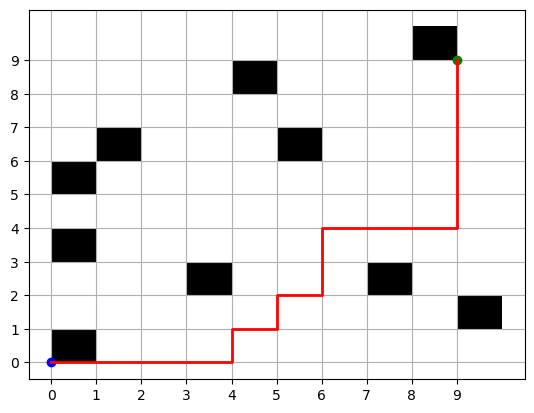

In [6]:
# Plot grid world
fig, ax = plt.subplots()
for obstacle in obstacle_pos:
    ax.add_patch(plt.Rectangle((obstacle[1], obstacle[0]), 1, 1, facecolor='k'))
ax.plot(start_state[1], start_state[0], 'bo')
ax.plot(goal_state[1], goal_state[0], 'go')
x, y = zip(*trajectory)
ax.plot(y, x, linewidth=2, color='r')
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(True)
plt.show()